In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [93]:
data = pd.read_excel(r"C:\Users\rohit\Downloads\archive (17)\Data_Train.xlsx")

In [94]:
pd.set_option('display.max_columns' , None)

In [95]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [97]:
data.shape

(10683, 11)

In [98]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [99]:
data = data.dropna()

In [100]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [101]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [102]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [103]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## EDA

In [104]:
data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [105]:
data['day_of_journey'] = pd.to_datetime(data['Date_of_Journey'] , format="%d/%m/%Y").dt.day
data['month_of_journey'] = pd.to_datetime(data['Date_of_Journey'] , format="%d/%m/%Y").dt.month

In [106]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [107]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [108]:
data.drop(['Date_of_Journey' , 'Dep_Time'] ,axis=1 , inplace=True)

In [109]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [110]:
# now we extract the important inforamtion from arrival columns

data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [111]:
data.drop('Arrival_Time' , axis=1, inplace=True)

In [112]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [113]:
df = data['Duration'].str.split(' ' , expand=True)

hr = []
for val in df[0]:
    hr.append(int(val[:-1]))
    
data['Duration_hour'] = np.array(hr).reshape(10682 ,1)

In [114]:
minu = []
for minute in df[1]:
    if minute==None:
        minu.append(0)
    else:
        minu.append(int(minute[:-1]))
data['Duration_minute']=np.array(minu).reshape(10682,1)

In [115]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling the Categorical Data

In [116]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [117]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Figure size 1600x900 with 0 Axes>

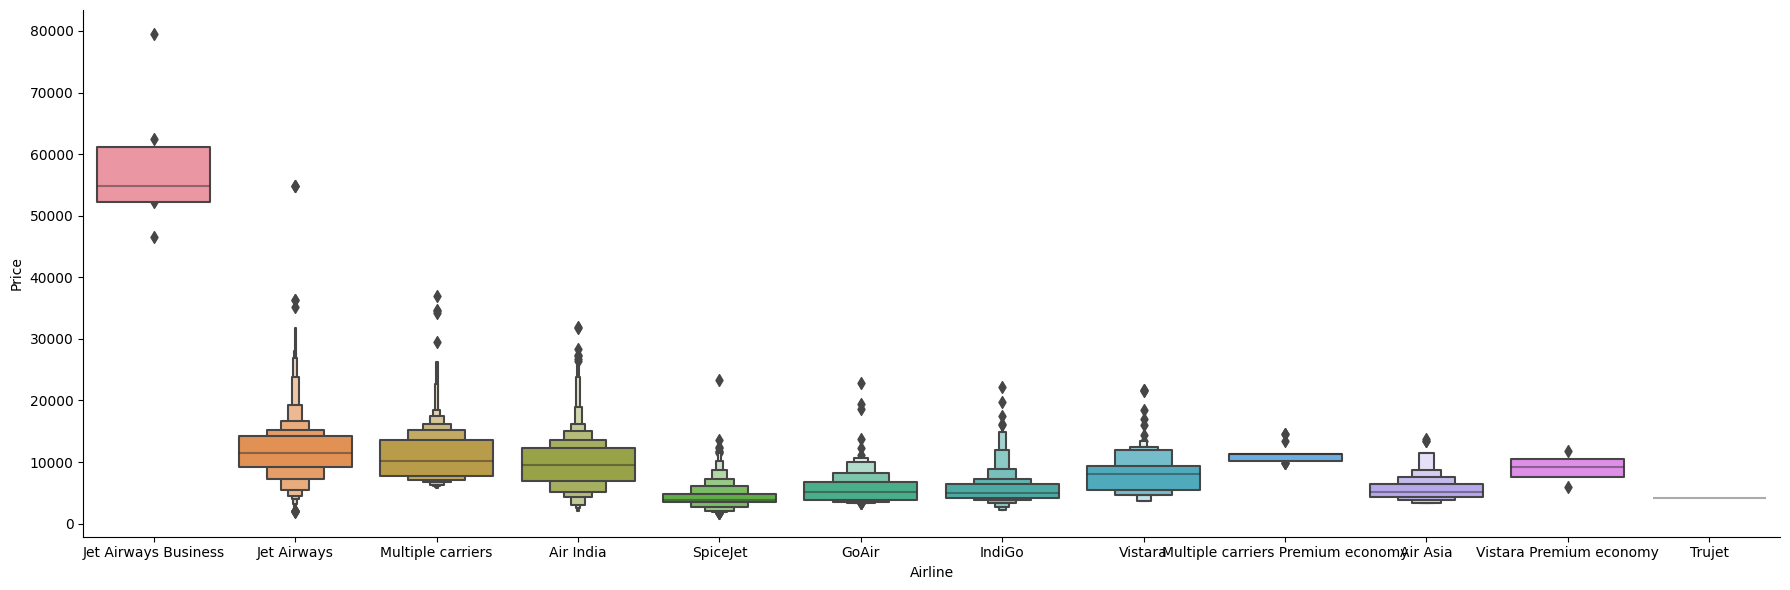

In [118]:
plt.figure(figsize=(16,9))
sns.catplot(x = 'Airline' ,y='Price', data=data.sort_values(by='Price' , ascending=False) , kind='boxen' , height=6,aspect=3)
plt.show()

In [119]:
Airlines = data['Airline']


In [120]:
airline = pd.get_dummies(Airlines)
airline = airline.astype(int)
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [121]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


<Axes: ylabel='count'>

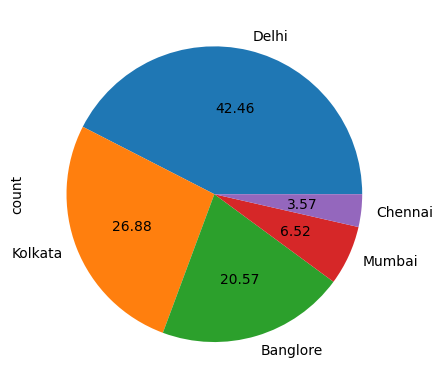

In [122]:
data['Source'].value_counts().plot(kind='pie' , autopct='%.2f')

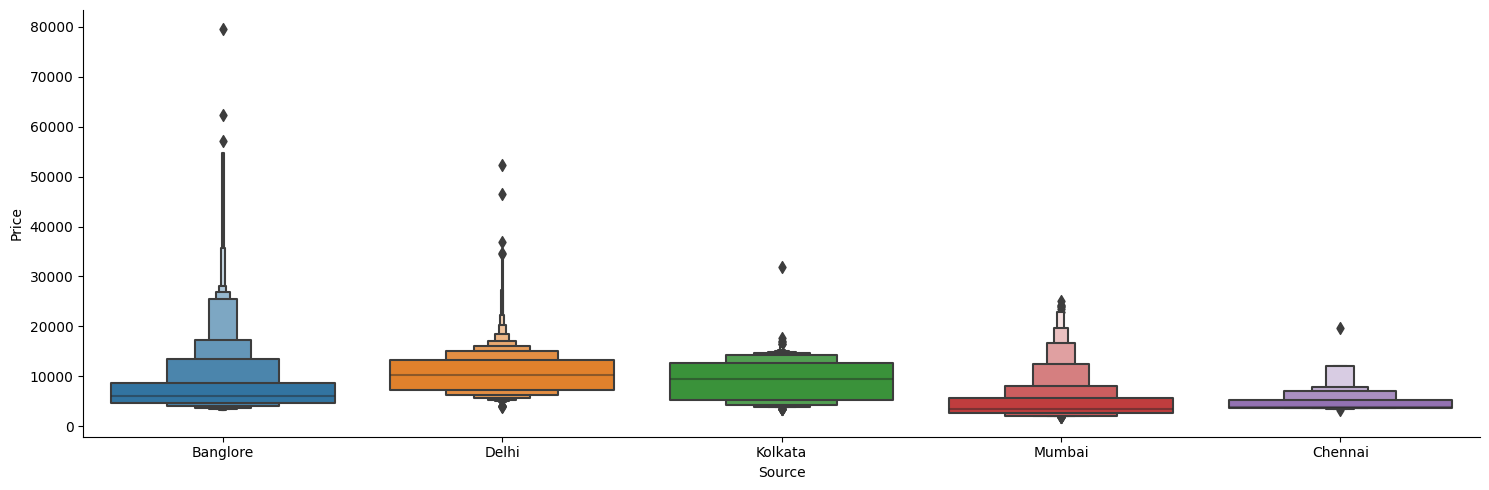

In [123]:
sns.catplot(x ='Source' , y='Price' , data = data.sort_values(by='Price',ascending=False) ,kind='boxen' , aspect=3 , height=5);

In [126]:
source = data['Source']
source = pd.get_dummies(source).astype(int)
source = source.rename(columns = {'Banglore':'s_banglore','Chennai':'S_chennai','Delhi':'S_delhi','Kolkata':'S_kolkata' , 'Mumbai':'s_mumbai'})

In [127]:
# lets see the destination 
data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [128]:
Destination = data['Destination']
Destination = pd.get_dummies(Destination).astype(int)
Destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [129]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [130]:

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [131]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [132]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [133]:
data['Total_Stops']=data['Total_Stops'].map({'1 stop':1 ,'non-stop':0  , '2 stops':2 , '3 stops':3 , '4 stops' : 4})

In [134]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [135]:
# we forgate to remove the Duration
data.drop('Duration' , axis=1 , inplace=True)

In [136]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [137]:
# now we remove Airline , Source , Destination and add it's number version
data.drop(['Airline' , 'Source' , 'Destination'] ,axis=1 , inplace=True)

In [138]:
data = pd.concat([airline ,source, Destination,data ],axis=1)

In [139]:
data.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45


In [140]:
data.shape

(10682, 33)

# Similarly we apply for the Testing data

In [277]:
data_test = pd.read_excel(r"C:/Users/rohit/Downloads/archive (17)/Test_set.xlsx")
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [250]:
data_test['Dep_Time'].unique()

array(['17:30', '06:20', '19:15', '08:00', '23:55', '18:15', '07:30',
       '15:15', '10:10', '16:30', '13:55', '06:50', '09:00', '05:45',
       '21:25', '13:15', '09:55', '22:55', '10:45', '20:00', '05:30',
       '21:05', '16:00', '14:00', '22:50', '19:50', '07:10', '05:55',
       '16:55', '18:55', '10:20', '17:10', '13:00', '22:45', '21:00',
       '17:45', '09:25', '14:05', '09:45', '02:00', '11:40', '17:00',
       '06:00', '07:05', '16:45', '19:40', '03:50', '21:15', '11:30',
       '12:00', '21:50', '05:50', '07:55', '09:10', '08:20', '09:30',
       '10:00', '14:55', '22:10', '07:00', '19:55', '19:30', '15:00',
       '05:35', '06:40', '17:15', '21:20', '07:35', '06:55', '17:35',
       '11:15', '20:15', '20:25', '05:40', '15:05', '20:55', '14:25',
       '19:45', '08:25', '22:00', '21:10', '02:15', '08:30', '20:40',
       '14:15', '14:35', '11:10', '19:35', '15:20', '06:10', '22:20',
       '08:35', '14:40', '09:40', '01:30', '08:50', '19:05', '08:55',
       '11:35', '04:

In [284]:
import datetime 

l = []
for i in data_test['Dep_Time'].unique():
    
    a = datetime.datetime.strptime(i,'%H:%M')
    print(a.tie)


1900-01-01 17:30:00
1900-01-01 06:20:00
1900-01-01 19:15:00
1900-01-01 08:00:00
1900-01-01 23:55:00
1900-01-01 18:15:00
1900-01-01 07:30:00
1900-01-01 15:15:00
1900-01-01 10:10:00
1900-01-01 16:30:00
1900-01-01 13:55:00
1900-01-01 06:50:00
1900-01-01 09:00:00
1900-01-01 05:45:00
1900-01-01 21:25:00
1900-01-01 13:15:00
1900-01-01 09:55:00
1900-01-01 22:55:00
1900-01-01 10:45:00
1900-01-01 20:00:00
1900-01-01 05:30:00
1900-01-01 21:05:00
1900-01-01 16:00:00
1900-01-01 14:00:00
1900-01-01 22:50:00
1900-01-01 19:50:00
1900-01-01 07:10:00
1900-01-01 05:55:00
1900-01-01 16:55:00
1900-01-01 18:55:00
1900-01-01 10:20:00
1900-01-01 17:10:00
1900-01-01 13:00:00
1900-01-01 22:45:00
1900-01-01 21:00:00
1900-01-01 17:45:00
1900-01-01 09:25:00
1900-01-01 14:05:00
1900-01-01 09:45:00
1900-01-01 02:00:00
1900-01-01 11:40:00
1900-01-01 17:00:00
1900-01-01 06:00:00
1900-01-01 07:05:00
1900-01-01 16:45:00
1900-01-01 19:40:00
1900-01-01 03:50:00
1900-01-01 21:15:00
1900-01-01 11:30:00
1900-01-01 12:00:00


In [143]:
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [144]:
data_test['day_of_journey'] = pd.to_datetime(data_test['Date_of_Journey'] , format="%d/%m/%Y").dt.day
data_test['month_of_journey'] = pd.to_datetime(data_test['Date_of_Journey'] , format="%d/%m/%Y").dt.month


data_test['Dep_hour']=pd.to_datetime(data_test['Dep_Time']).dt.hour
data_test['Dep_min'] = pd.to_datetime(data_test['Dep_Time']).dt.minute

# now we extract the important inforamtion from arrival columns

data_test['Arrival_hour'] = pd.to_datetime(data_test['Arrival_Time']).dt.hour
data_test['Arrival_minute'] = pd.to_datetime(data_test['Arrival_Time']).dt.minute

# droping unwanted column now
data_test.drop(['Date_of_Journey' , 'Dep_Time' , 'Arrival_Time'] ,axis=1 , inplace=True)

# extracting the duration from the data
df = data_test['Duration'].str.split(' ' , expand=True)
hr = []
for val in df[0]:
    hr.append(int(val[:-1]))
    
data_test['Duration_hour'] = np.array(hr).reshape(2671  ,1)

minu = []
for minute in df[1]:
    if minute==None:
        minu.append(0)
    else:
        minu.append(int(minute[:-1]))
data_test['Duration_minute']=np.array(minu).reshape(2671 ,1)


In [145]:

airline = pd.get_dummies(data_test['Airline'])
airline = airline.astype(int)

source = data_test['Source']
source = pd.get_dummies(source).astype(int)


Destination = data_test['Destination']
Destination = pd.get_dummies(Destination).astype(int)


data_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

data_test['Total_Stops']=data_test['Total_Stops'].map({'1 stop':1 ,'non-stop':0  , '2 stops':2 , '3 stops':3 , '4 stops' : 4})

# now we remove Airline , Source , Destination and add it's number version
data_test.drop(['Airline' , 'Source' , 'Destination' ,'Duration'] ,axis=1 , inplace=True)


df = pd.concat([airline ,source, Destination,data_test ],axis=1)

In [146]:
df

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,6,6,17,30,4,25,10,55
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12,5,6,20,10,20,4,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,21,5,8,0,21,0,13,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,6,6,20,30,20,25,23,55
2667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,27,3,14,20,16,55,2,35
2668,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,6,3,21,50,4,25,6,35
2669,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,6,3,4,0,19,15,15,15


In [147]:
df['Total_Stops'].value_counts()

Total_Stops
1    1431
0     849
2     379
3      11
4       1
Name: count, dtype: int64

# Feature Selection
- we use feature selection method such as,
    - heatmap
    - feature_importance_
    - SelectKBest

In [148]:
data.shape

(10682, 33)

In [149]:
corr_data = data[['Total_Stops','Price','day_of_journey','month_of_journey','Dep_hour','Dep_min','Arrival_hour' ,'Arrival_minute','Duration_hour','Duration_minute']]

In [150]:
corr_data.corr()

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.740049,-0.136749
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508902,-0.124899
day_of_journey,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022109,-0.008915
month_of_journey,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016061,-0.040854
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002903,-0.023723
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022030,0.092443
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055300,-0.118315
Arrival_minute,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074352,0.151571
Duration_hour,0.740049,0.508902,-0.022109,0.016061,0.002903,-0.022030,0.055300,-0.074352,1.000000,-0.126528
Duration_minute,-0.136749,-0.124899,-0.008915,-0.040854,-0.023723,0.092443,-0.118315,0.151571,-0.126528,1.000000


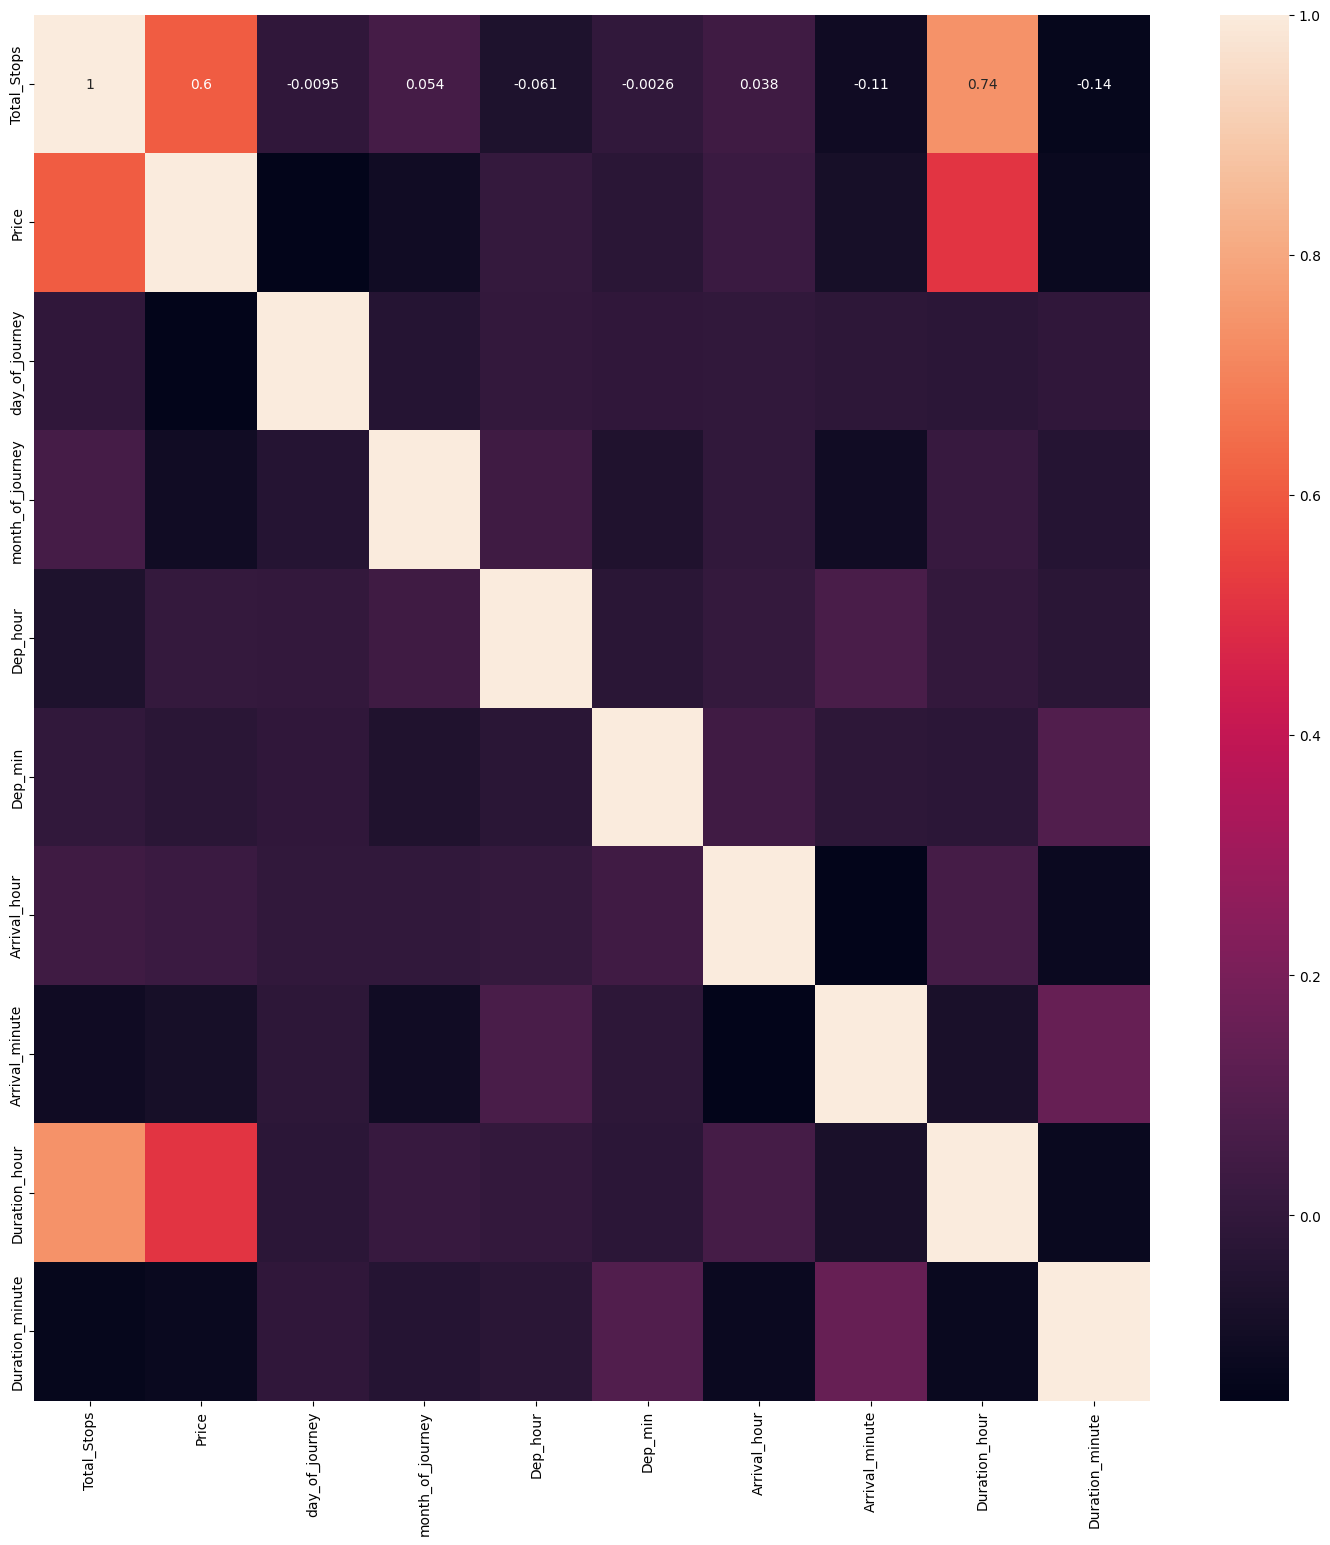

In [151]:
# finding the correlation plot 
plt.figure(figsize=(18,18))
corr_matrix = corr_data.corr()
sns.heatmap(data = corr_matrix ,annot=True)
plt.show()

In [152]:
data.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45


In [154]:
#Splitting up the data 
x = data.loc[: ,['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 's_banglore', 'S_chennai', 'S_delhi', 'S_kolkata',
       's_mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'day_of_journey',
       'month_of_journey', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_minute', 'Duration_hour', 'Duration_minute']]
x.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,3,16,50,21,35,4,45


In [155]:
x.drop_duplicates()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,5,10,20,19,0,8,40
10678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,9,4,19,55,22,25,2,30
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10681,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,3,11,30,14,10,2,40


In [156]:
x = x.iloc[: , ~x.columns.duplicated()]

In [157]:
x.shape

(10682, 32)

In [158]:
x

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,9,4,19,55,22,25,2,30
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,3,11,30,14,10,2,40


In [159]:
y = data.loc[: , 'Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [160]:
# important features from ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x , y )

ExtraTreesRegressor()

In [161]:
print(selection.feature_importances_)

[2.33059628e-03 8.09295014e-03 1.99842307e-03 2.09699745e-02
 1.31394211e-01 6.68718944e-02 1.79760412e-02 7.85496320e-04
 2.99426387e-03 1.33021921e-04 4.53341674e-03 8.49909079e-05
 7.86659291e-03 4.01955670e-04 1.10896976e-02 2.16052056e-03
 5.90591911e-03 2.05819269e-03 7.01552788e-03 1.26241708e-02
 5.20593765e-03 4.88578957e-04 1.73460924e-02 2.32931822e-01
 1.45128003e-01 5.22172526e-02 2.35300887e-02 2.05992839e-02
 2.79931595e-02 1.86416655e-02 1.30726736e-01 1.79035219e-02]


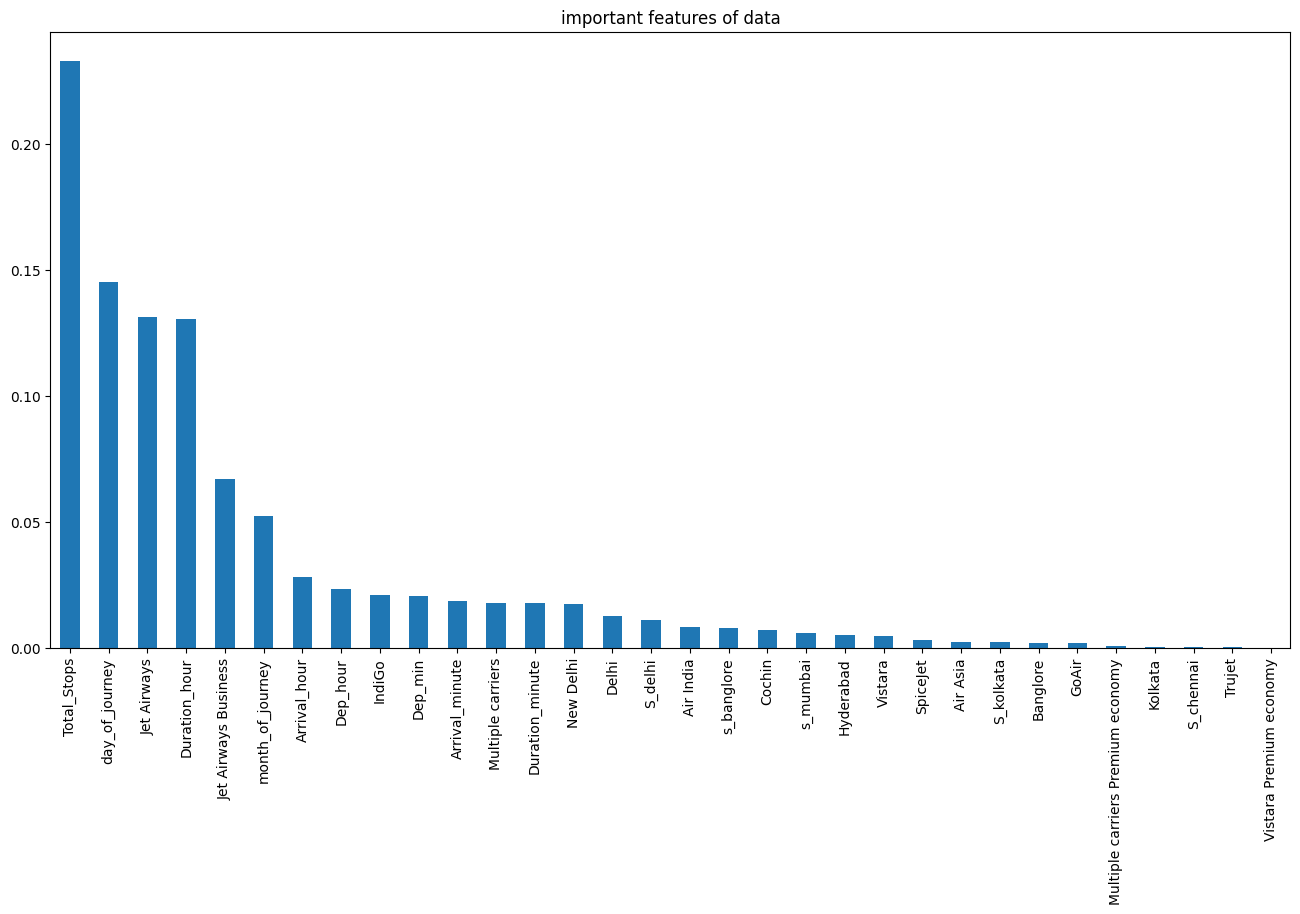

In [162]:
# lets.see the features

plt.figure(figsize=(16,8))
plt.title('important features of data')
feature = pd.Series(selection.feature_importances_ , index=x.columns)
feature.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [163]:
feature

Air Asia                             0.002331
Air India                            0.008093
GoAir                                0.001998
IndiGo                               0.020970
Jet Airways                          0.131394
Jet Airways Business                 0.066872
Multiple carriers                    0.017976
Multiple carriers Premium economy    0.000785
SpiceJet                             0.002994
Trujet                               0.000133
Vistara                              0.004533
Vistara Premium economy              0.000085
s_banglore                           0.007867
S_chennai                            0.000402
S_delhi                              0.011090
S_kolkata                            0.002161
s_mumbai                             0.005906
Banglore                             0.002058
Cochin                               0.007016
Delhi                                0.012624
Hyderabad                            0.005206
Kolkata                           

In [181]:
x

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,9,4,19,55,22,25,2,30
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,3,11,30,14,10,2,40


In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y , test_size=0.2 , random_state=42)

In [166]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train , y_train)

RandomForestRegressor()

In [167]:
y_pred = rf.predict(x_test)

In [168]:
from sklearn.metrics import mean_squared_error , r2_score

r2_score(y_test , y_pred)

0.7973770032191791

In [169]:
rf.score(x_train , y_train)

0.9528922483180249

In [170]:
rf.score(x_test , y_test)

0.7973770032191791

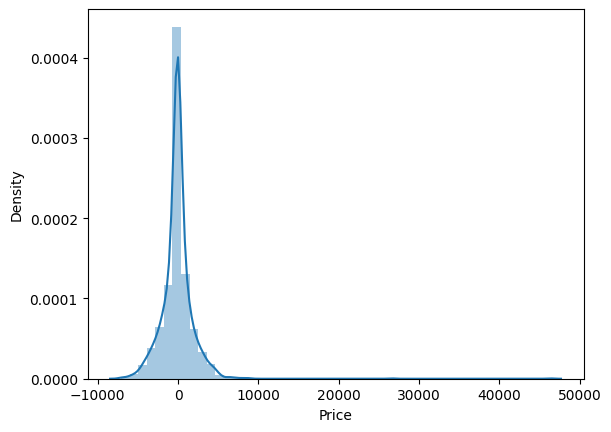

In [171]:
sns.distplot(y_test - y_pred)
plt.show()
# the data is right skewed data 

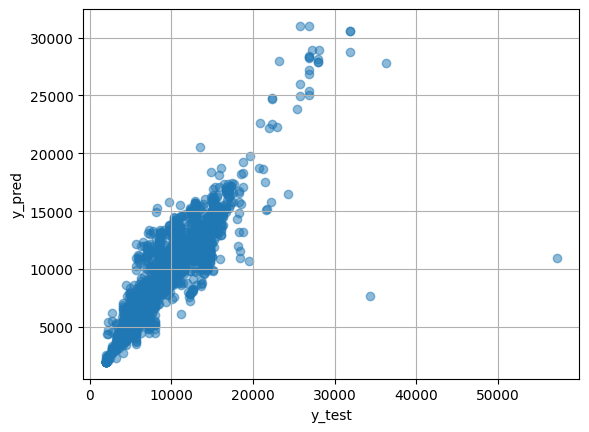

In [172]:
plt.scatter(y_test , y_pred,alpha=0.5)
plt.grid()
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [173]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

print('mean squared error : ' , mean_squared_error(y_test , y_pred))
print('mean absolute error : ' , mean_absolute_error(y_test , y_pred))
print('root mean squared error: ' , np.sqrt(mean_squared_error(y_test , y_pred)))

mean squared error :  4368968.469158512
mean absolute error :  1176.892227590937
root mean squared error:  2090.20775741516


In [174]:
 np.sqrt(mean_squared_error(y_test , y_pred)) / (np.max(y_train) - np.min(y_train))

0.02688266378680128

### Hyperparameter Tuning

1) GridSearchCV  --> slow but optimal values
2) RandomizedSearchCV --> Fast but luck

In [72]:
from sklearn.model_selection  import RandomizedSearchCV ,GridSearchCV

params = { 'n_estimators' : [int(i) for i in range(50 , 200  , 30)] , 
          'max_depth' : [i for i in range(5, 30 , 6)] ,
          'min_samples_split': [2 , 4 , 6 , 9 ] ,
          'min_samples_leaf': [1,3 , 5, 7],
          'max_features':['auto', 'sqrt']
}

In [102]:
# apping all above params to model and finding out the best params
rf_search  = RandomizedSearchCV(estimator=rf , param_distributions=params ,scoring='neg_mean_squared_error' , n_iter = 10 , cv=5 , n_jobs = 1 ,
                                verbose=0 , random_state=42)

In [105]:
Grid  = GridSearchCV(estimator=rf , param_grid=params ,scoring='neg_mean_squared_error'  , cv=5 , n_jobs = 1 ,
                                verbose=1 )

In [106]:
Grid.fit(x_train , y_train)


## note: it takes 30 mins to find best parameters in my computer system 

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=29, max_features='sqrt',
                                             min_samples_leaf=5,
                                             n_estimators=50),
             n_jobs=1,
             param_grid={'max_depth': [5, 11, 17, 23, 29],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 9],
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error', verbose=1)

In [107]:
Grid.best_params_

{'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 170}

In [108]:
y_pred = Grid.predict(x_test)

r2_score(y_test , y_pred)

0.8294816603721593

In [73]:
# here we added the parameters which RandomizedSearchCV suggested

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 50,min_samples_split= 2,min_samples_leaf=5,
 max_features='sqrt',max_depth=29)
rf.fit(x_train , y_train)

y_pred = rf.predict(x_test)
r2_score(y_test , y_pred)

0.781858888719456

In [242]:
# here we added the parameters which GridSearchCV suggested

from sklearn.ensemble import RandomForestRegressor

rf_grid = RandomForestRegressor(n_estimators= 170,min_samples_split= 6,min_samples_leaf=1,
 max_features='sqrt',max_depth=17)
rf_grid.fit(x_train_norm , y_train)

y_pred = rf_grid.predict(x_test_norm)
r2_score(y_test , y_pred)


0.8248672118521598

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [197]:
x_train_norm

array([[0.        , 0.        , 0.        , ..., 0.27272727, 0.19565217,
        0.81818182],
       [0.        , 0.        , 0.        , ..., 0.63636364, 0.52173913,
        0.09090909],
       [0.        , 0.        , 0.        , ..., 0.09090909, 0.10869565,
        0.36363636],
       ...,
       [0.        , 0.        , 0.        , ..., 0.54545455, 0.23913043,
        0.72727273],
       [0.        , 0.        , 0.        , ..., 0.45454545, 0.02173913,
        0.81818182],
       [0.        , 0.        , 0.        , ..., 0.45454545, 0.30434783,
        0.45454545]])

In [247]:
x_train

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_banglore,S_chennai,S_delhi,S_kolkata,s_mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
10005,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,27,5,8,30,19,15,10,45
3684,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,9,5,11,30,12,35,25,5
1034,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,24,4,15,45,22,5,6,20
3909,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,21,3,12,50,1,35,12,45
3088,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,24,6,17,15,19,15,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,27,3,9,0,4,25,19,25
5191,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,9,5,14,5,20,45,6,40
5390,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,15,5,12,50,1,30,12,40
860,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,3,0,40,3,25,2,45


In [230]:
from sklearn.model_selection import cross_val_score,KFold

kfold = KFold(shuffle=True , n_splits=5 ,random_state=42)

In [231]:
score = cross_val_score(rf_grid , x_train , y_train , cv=kfold , scoring='r2')

In [233]:
score.mean()

0.7964474734453805

- it means that gridSearchCV gives the best parameter values than Randomized 

# save the model

In [236]:
import pickle

In [243]:
file = open('flight_model.sav' , 'wb')

pickle.dump(rf_grid , file)



In [244]:
model = open('flight_model.sav' , 'rb')

forest = pickle.load(model)

In [245]:
y_pred = forest.predict(x_test_norm)

In [246]:
r2_score(y_test , y_pred)

0.8248672118521598